In [1]:
!pip install tabula-py unidecode

# Imports

In [1]:
import tabula as tb
import pandas as pd
import os
import unidecode
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Load files

In [2]:
path = "Source"
source = os.listdir(path)
files = []
for ii in source:
    aux = os.listdir(f'{path}/{ii}/')
    for jj in aux:
        files.append(f'{path}/{ii}/{jj}')
        
files

['Source/2019/CARREFOUR_01_08_19.pdf',
 'Source/2019/CARREFOUR_03_06_19.pdf',
 'Source/2019/CARREFOUR_04_07_19.pdf',
 'Source/2019/CARREFOUR_11_04_19.pdf',
 'Source/2019/CARREFOUR_14_04_19.pdf',
 'Source/2019/CARREFOUR_15_05_19.pdf',
 'Source/2019/CARREFOUR_15_07_19.pdf',
 'Source/2019/CARREFOUR_17_04_19.pdf',
 'Source/2019/CARREFOUR_21_07_19.pdf',
 'Source/2019/CARREFOUR_22_05_19.pdf',
 'Source/2019/CARREFOUR_23_06_19.pdf',
 'Source/2019/CARREFOUR_25_06_19.pdf',
 'Source/2019/CARREFOUR_25_07_19.pdf',
 'Source/2019/CARREFOUR_27_05_19.pdf',
 'Source/2019/CARREFOUR_30_04_19.pdf',
 'Source/2019/CARREFOUR_30_07_19.pdf',
 'Source/2019/LOTUS_06_08_19.pdf',
 'Source/2019/MIRANDA_02_07_19.pdf',
 'Source/2019/NORDESTAO_13_06_19.pdf',
 'Source/2019/POSTO_19_07_19.pdf',
 'Source/2019/SAMS_20_06_19.pdf']

In [3]:
df = pd.DataFrame()

for ii in tqdm(files):
    aux = tb.read_pdf(ii ,pages='all', multiple_tables=False, pandas_options={'decimal': ','})
    fileName = ii[:-4].split('/')[-1]
    name, data = fileName.split('_', 1)
        
    for subTable in aux:
        subTable["Empresa"] = name.capitalize()
        subTable['Data'] = data

        df = pd.concat([df, subTable], axis=0)

df.reset_index(inplace=True)
df.drop(labels=['Item', 'index'], axis=1, inplace=True)
cols = dict(zip(df.columns.tolist(), list(map(unidecode.unidecode, df.columns.tolist()))))
df.rename(columns=cols, inplace=True)
df.Data = pd.to_datetime(df.Data, format="%d_%m_%y")
df.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [01:02<00:00,  3.00s/it]


,Descricao,Qtde.,Unid.,Vl. unid.,Vl. total,Empresa,Data
0,SAB BARRA NIVEA LEIT,1.0,UN,8.29,8.29,Carrefour,2019-08-01
1,SAB BARRA NIVEA LEIT,1.0,UN,8.29,8.29,Carrefour,2019-08-01
2,LEITE UHT PIRACANJUB,1.0,UN,4.49,4.49,Carrefour,2019-08-01
3,LEITE UHT PIRACANJUB,1.0,UN,4.49,4.49,Carrefour,2019-08-01
4,LEITE UHT PIRACANJUB,1.0,UN,4.49,4.49,Carrefour,2019-08-01


# Categorização

In [4]:
def criaDict(values, key):
    return dict(zip(values, [key]*(len(values))))

def criaMasterDict(dictionaries):
    aux = {}
    for ii in dictionaries:
        aux = aux | ii
        
    return aux

def categorizador(val, dc):
    aux = dc.keys()
    for ii in aux:
        if ii in val:
            try:
                return dc[ii]
            except:
                continue
            
    return 'Uncat'

In [9]:
# Grupo 1 - Cereais, pães, raízes e tubérculos
cereaisPList = ['ARROZ', 'FEIJAO', 'CUSCUZ', 'MASSA', 'GRANO DURO', 'MOLHO TOM', 'EXTRATO TOM', 'MOLHO', 'SAZON']
cereaisPDict = criaDict(cereaisPList, 'Cereais principais')

cereaisSList = ['GRANOLA', 'BICO', 'LENTILHA']
cereaisSDict = criaDict(cereaisSList, 'Cereais secundarios')

padariaList = ['PAO', 'BOLO', 'PIZZA', 'LASANHA']
padariaDict = criaDict(padariaList, 'Padaria')

# Grupo 2 - Hortaliças
hortaList = ['BATATA', 'CEBOLA', 'PIMENTAO', 'BETERRABA', 'BROCO', 'CENOURA', 'TOMATE','BERINJELA', 'ABOBRINHA', \
            'ALHO', 'RABANETE', 'COUVE', 'LIMAO', 'ALFACE', 'COENTRO', 'RUCULA', 'ACAFRAO', 'PEPINO', 'MELAO', 'CEBOLINHA']
hortaDict = criaDict(hortaList, 'Hortalicas')

# Grupo 3 - Frutas e sucos de frutas
frutasList = ['ABACATE', 'MACA', 'MAMAO', 'UVA', 'BANANA', 'ABACAXI', 'MORANGO', 'CHA']
frutasDict = criaDict(frutasList, 'Frutas')

# Grupo 4 - Leites, queijos e iogurtes
laticiniosList = ['LTE', 'LEITE', 'QUEIJO', 'MANTEIGA', 'IOG', 'QJ', 'MUSS', 'PARME', 'GORGON']
laticiniosDict = criaDict(laticiniosList, 'Laticinio')

# Grupo 5 - Carnes e Ovos
proteinaList = ['CARNE', 'STROGONOFF', 'PEITO', 'BIFE', 'LINGUI', 'LING', 'BACON', 'OVO', 'MORTA', 'PRES']
proteinaList = criaDict(proteinaList, 'Proteina')

# Grupo 6 - Leguminosas

# Grupo 7 - Óleos e gorduras
oleoList = ['AZEITE', 'OLEO SOJA']
oleoDict = criaDict(oleoList, 'Oleo')

# Grupo 8 - Açucares, balas, chocolates, salgadinhos
doceList = ['PE MOCA', 'BANANADA', 'CHOC TAB', 'AMENDOIM', 'BISC', 'CHOC']
doceDict = criaDict(doceList, 'Acucares/Salgado')

# Higiene
higienePList = ['DENT', 'SAB', 'SABONETE']
higienePDict = criaDict(higienePList, 'Higiene pessoal')

higieneDList = ['DET', 'SABAO', 'AMAC', 'P HIG', 'PAPEL', 'OLEO AMENDOAS']
higieneDDict = criaDict(higieneDList, 'Higiene domestica')

# Outros
outrosList = ['BATERIA', 'CHIN', 'PILHA', 'VHO', 'MIS BETTY']
outrosDict = criaDict(outrosList, 'Outros')

masterDict = criaMasterDict([cereaisPDict, cereaisSDict, padariaDict, hortaDict, frutasDict, laticiniosDict, proteinaList, \
                             oleoDict, doceDict, higienePDict, higieneDDict, outrosDict])

In [10]:
df['Categoria'] = df.Descricao.apply(lambda x: categorizador(x, masterDict))

mask = df.Categoria == 'Uncat'
display(df[mask])

df.groupby('Categoria').Categoria.count()

,Descricao,Qtde.,Unid.,Vl. unid.,Vl. total,Empresa,Data,Categoria
32,ACUCARCRISTCUCAR 1K,1.0,UN,2.99,2.99,Carrefour,2019-07-04,Uncat
38,ALCAPARRAS HEMMER 10,1.0,UN,10.69,10.69,Carrefour,2019-07-04,Uncat
104,SAL REFINADO CARREFO,1.0,UN,1.59,1.59,Carrefour,2019-07-15,Uncat
105,SAL GROSSO CARREFOUR,1.0,UN,1.89,1.89,Carrefour,2019-07-15,Uncat
109,MAC FIDELINHO VITARE,1.0,UN,3.29,3.29,Carrefour,2019-07-15,Uncat
110,MAC FIDELINHO VITARE,1.0,UN,3.29,3.29,Carrefour,2019-07-15,Uncat
116,AZE V FAT CRFO 180G,1.0,UN,6.99,6.99,Carrefour,2019-07-15,Uncat
117,DESOD SPRAY NIVEA ME,1.0,UN,5.39,5.39,Carrefour,2019-07-15,Uncat
134,MAC SEMO NINHO FORTA,1.0,UN,4.69,4.69,Carrefour,2019-04-17,Uncat
194,CH GAROTO CARIBE 28G,1.0,UN,2.19,2.19,Carrefour,2019-07-25,Uncat


Categoria
Acucares/Salgado       10
Cereais principais     30
Cereais secundarios     5
Frutas                 27
Higiene domestica       6
Higiene pessoal         8
Hortalicas             78
Laticinio              58
Oleo                    2
Outros                  8
Padaria                16
Proteina               15
Uncat                  21
Name: Categoria, dtype: int64

In [11]:
df.head()

,Descricao,Qtde.,Unid.,Vl. unid.,Vl. total,Empresa,Data,Categoria
0,SAB BARRA NIVEA LEIT,1.0,UN,8.29,8.29,Carrefour,2019-08-01,Higiene pessoal
1,SAB BARRA NIVEA LEIT,1.0,UN,8.29,8.29,Carrefour,2019-08-01,Higiene pessoal
2,LEITE UHT PIRACANJUB,1.0,UN,4.49,4.49,Carrefour,2019-08-01,Laticinio
3,LEITE UHT PIRACANJUB,1.0,UN,4.49,4.49,Carrefour,2019-08-01,Laticinio
4,LEITE UHT PIRACANJUB,1.0,UN,4.49,4.49,Carrefour,2019-08-01,Laticinio


## Consumo

In [12]:
df[df.Categoria == 'Outros']

,Descricao,Qtde.,Unid.,Vl. unid.,Vl. total,Empresa,Data,Categoria
54,BATERIA ALCALINA DUR,1.0,UN,22.49,22.49,Carrefour,2019-04-11,Outros
64,CHIN RIDER STRIKE 10,1.0,UN,19.99,19.99,Carrefour,2019-04-14,Outros
135,PILHA ENERG ECO ADVA,1.0,UN,18.99,18.99,Carrefour,2019-04-17,Outros
136,PILHA DE ZINCO CARBO,1.0,UN,4.99,4.99,Carrefour,2019-04-17,Outros
145,VHO ITA BCO LAMBRUSC,1.0,UN,22.90,22.90,Carrefour,2019-04-17,Outros
215,MIS BETTY LAR 425G,1.0,UN,4.49,4.49,Carrefour,2019-04-30,Outros
216,MIS BETTY LAR 425G,1.0,UN,4.49,4.49,Carrefour,2019-04-30,Outros
278,VHO GIANCARLO,1.0,UN,29.98,29.98,Sams,2019-06-20,Outros


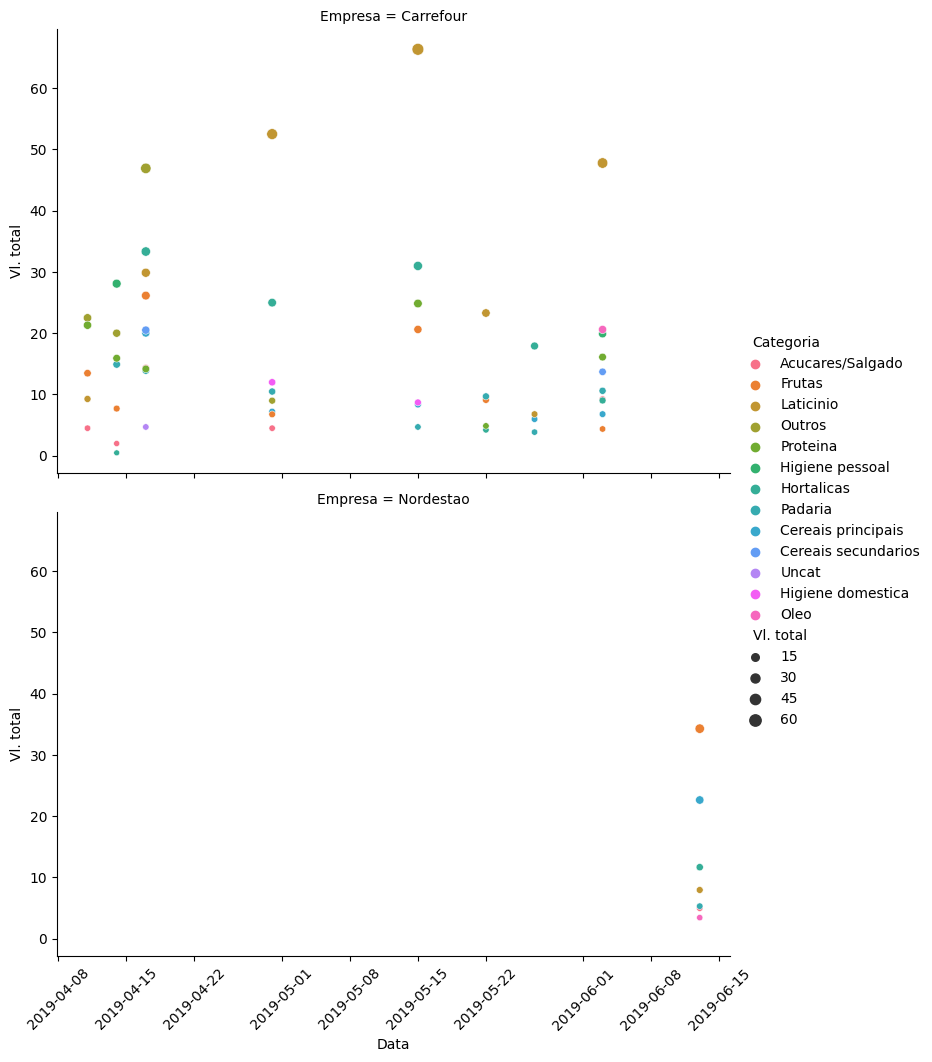

In [124]:
# Consumo por categoria
temp = pd.DataFrame(df.groupby(['Empresa', "Data", "Categoria"])['Vl. total'].sum()).reset_index()

# fig, ax = plt.subplots(figsize=(15,8))
sns.relplot(data=temp, x='Data', y='Vl. total', hue='Categoria', row='Empresa', size='Vl. total', aspect=1.5).set_xticklabels(rotation=45)
plt.show()

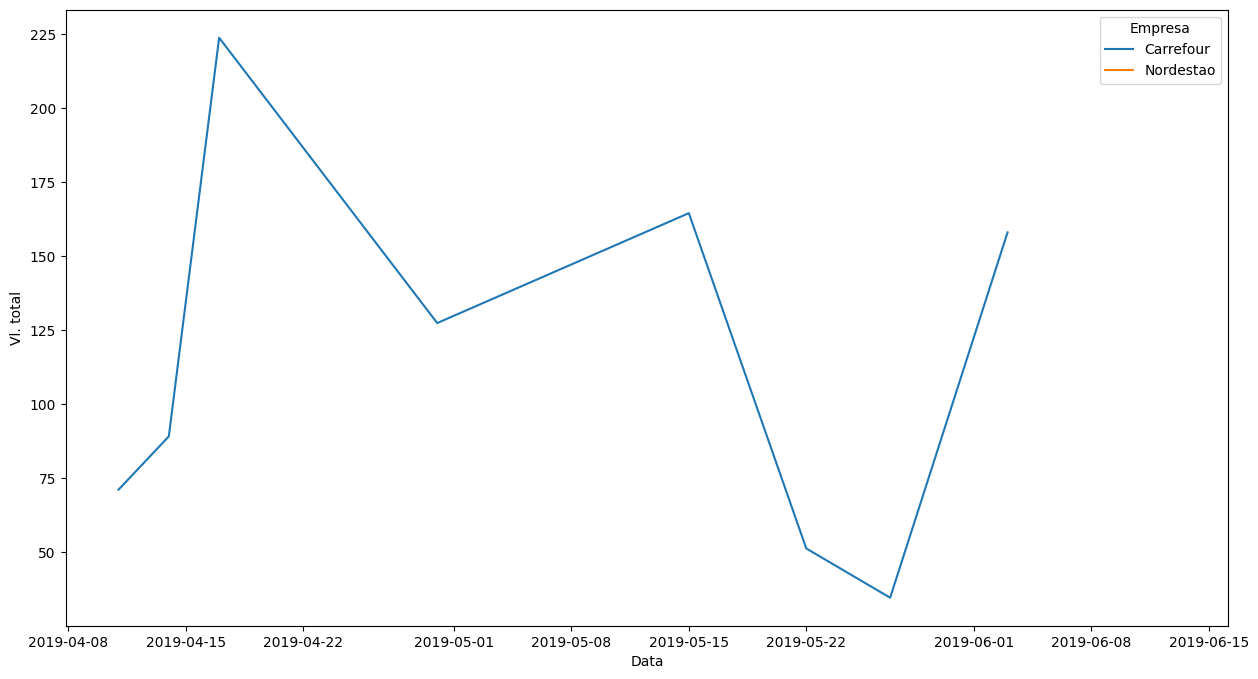

In [160]:
temp = pd.DataFrame(df.groupby(['Empresa', "Data"])['Vl. total'].sum()).reset_index()

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=temp, x='Data', y='Vl. total', hue='Empresa', ax=ax)

plt.show()

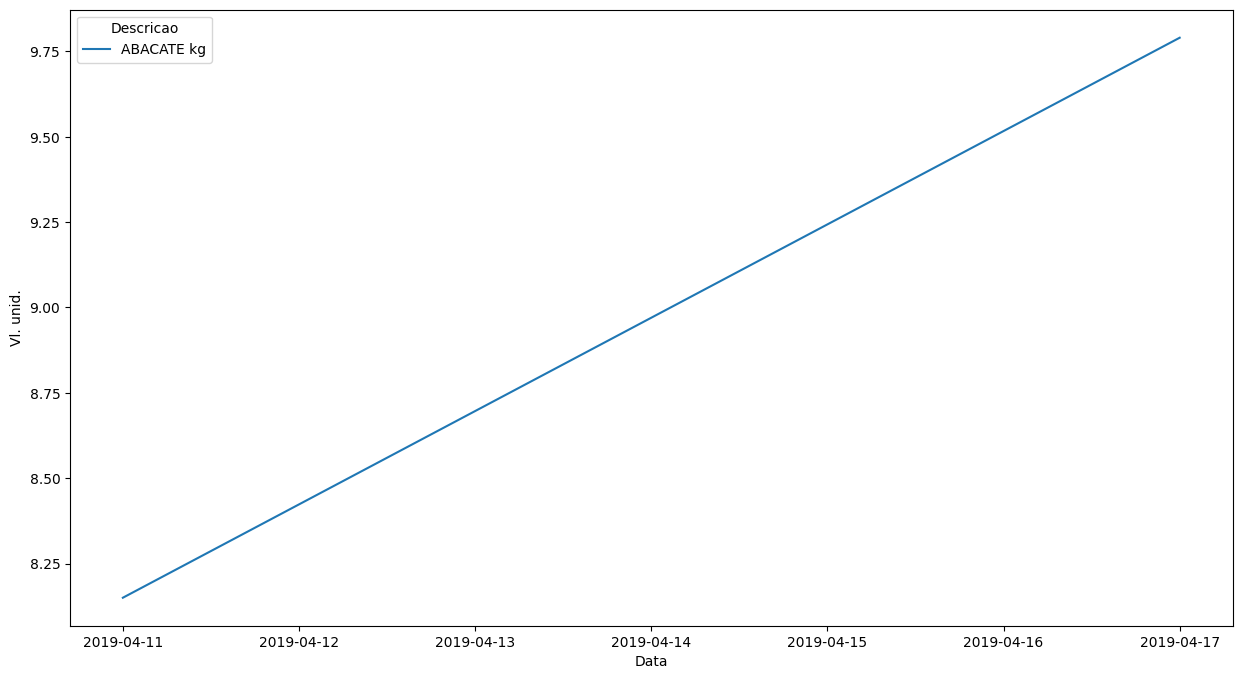

In [149]:
mask = (df.Descricao.str.contains('ABACATE'))

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=df[mask], x='Data', y='Vl. unid.', hue='Descricao', ax=ax)

plt.show()

In [144]:
df[mask]

,Descricao,Qtde.,Unid.,Vl. unid.,Vl. total,Empresa,Data
38,LEITE L VIDA ELEGE Z,1.0,UN,5.29,5.29,Carrefour,2019-05-15
39,LEITE L VIDA ELEGE Z,1.0,UN,5.29,5.29,Carrefour,2019-05-15
40,LEITE L VIDA ELEGE Z,1.0,UN,5.29,5.29,Carrefour,2019-05-15
41,LEITE L VIDA ELEGE Z,1.0,UN,5.29,5.29,Carrefour,2019-05-15
120,LEITE UHT BETANIA LACTOLIVRE CX 1L,1.0,UN,3.39,3.39,Carrefour,2019-05-27
121,LEITE UHT BETANIA LACTOLIVRE CX 1L,1.0,UN,3.39,3.39,Carrefour,2019-05-27
161,LEITE UHT PIRACANJUBA SEMI ZLACT CX 1L,1.0,UN,3.98,3.98,Nordestao,2019-06-13
162,LEITE UHT PIRACANJUBA SEMI ZLACT CX 1L,1.0,UN,3.98,3.98,Nordestao,2019-06-13
